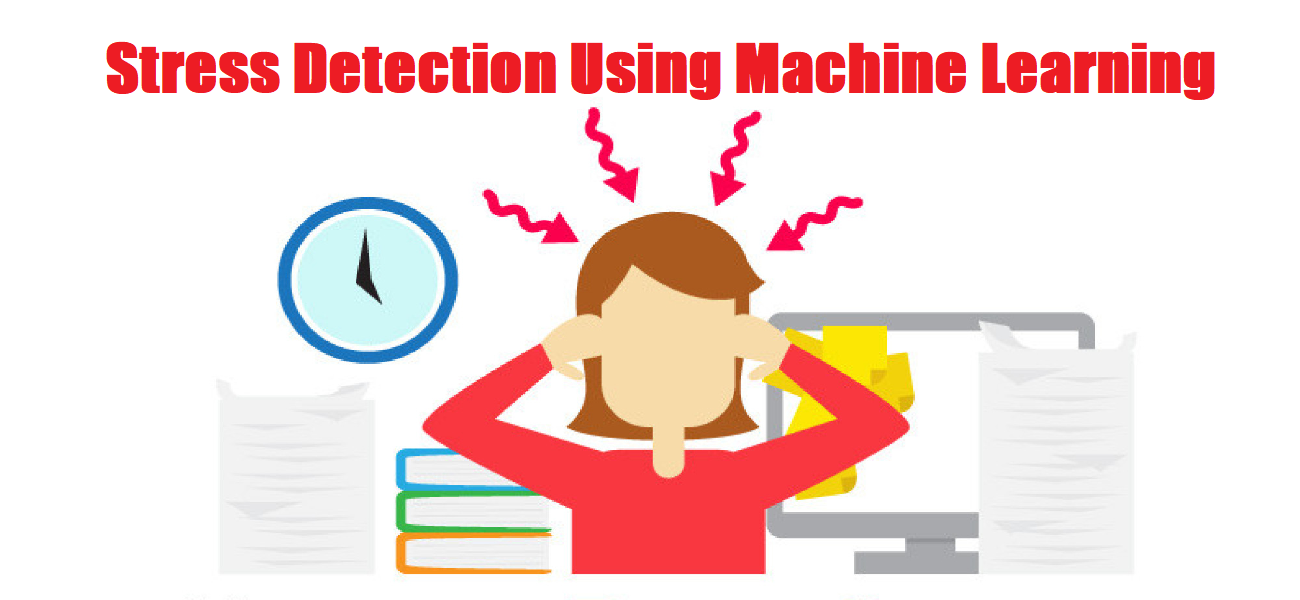

### Load and Read the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_colwidth=10000000
pd.options.display.max_columns=500

In [3]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\\NLP Dataset\\stress_detection.csv')
df.head()

subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f'n worried about my heart. I do happen to have a physical in 48 hours.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Hey there r/assistance, Not sure if this is the right place to post this.. but here goes =) I'm currently a student intern at Sandia National Labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. We're looking for current undergrad/grad STEM students so if you're a STEM student or know STEM students, I would greatly appreciate if you can help take or pass along this short survey. As a thank you

In [4]:
df.shape

(2838, 116)

In [5]:
df.size

329208

In [6]:
df.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

### Further Analysis i am goint to use Text and Label columns only

In [7]:
df=df[['text','label']]
df.head()

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f'n worried about my heart. I do happen to have a physical in 48 hours.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Hey there r/assistance, Not sure if this is the right place to post this.. but here goes =) I'm currently a student intern at Sandia National Labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. We're looking for current undergrad/grad STEM students so if you're a STEM student or know STEM students, I would greatly appreciate if you can help take or pass along this short survey. As a thank you, everyone who helps take the survey will be entered in to a drawing for chance to win one of three $50 Amazon gcs.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                My mom then hit me with the newspaper and it shocked me that she would do this, she knows I don't like play hitting, smacking, striking, hitting or violence of any sort on my person. Do I send out this vibe asking for it from the universe? Then yesterday I decided to take my friend to go help another "friend" move to a new place. While we were driving the friend we are moving strikes me on my shoulder. And I address it immediately because this is the 4th time I have told him not to do these things, then my other friend who is driving nearly gets into an collision with another car i think because he was high on marijuana and the friend we are moving in the backseat is like "you have to understand I was just trying to get your attention" you know the thing 5 year olds do to get peoples attention by smacking them, this guy is in his 60's.   
3  until i met my new boyfriend, he is amazing, he is kind, he is sweet, he is a good student, he likes the same things as me, my family lik

In [8]:
df.dtypes

text     object
label     int64
dtype: object

In [9]:
df.isna().sum()

text     0
label    0
dtype: int64

**No missing values**

### Text Preprocessing

In [10]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [11]:
stopword=set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [12]:
def clean(text):
    text=str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [lemmatizer.lemmatize(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [13]:
df['text']=df['text'].apply(clean)
df.head()

text  \
0                                                                                                                                                                                                                                                                                                                      said felt way suggeted go rest trigger ahead youire hypocondriac like decide look feeling doom hope maybe getting sucked rabbit hole ludicrous conspiracy stupid psychic test new age b something could even laugh road ended reading sense doom indicative various health ailment one prone top doom gloomi fn worried heart happen physical  hour   
1                                                                                                                                                                                                                                                             hey rassistance sure right place post go  im currently student intern sandia national lab working survey help improve marketing outreach effort many school recruit around country looking current undergradgrad stem student youre stem student know stem student would greatly appreciate help take pas along short survey thank everyone help take survey entered drawing chance win one three  amazon gc   
2                                                                                                                                                                                             mom hit newspaper shocked would know dont like play hitting smacking striking hitting violence sort person send vibe asking universe yesterday decided take friend go help another friend move new place driving friend moving strike shoulder address immediately  time told thing friend driving nearly get collision another car think high marijuana friend moving backseat like understand trying get attention know thing  year old get people attention smacking guy    
3  met new boyfriend amazing kind sweet good student like thing family like dont feel passion rush felt ex truth started going boyfriend secretly saw ex time see really didnt feel nothing disgusting didnt even want touch feel bad didnt want still kinda realized felt nothing love related ok hurt knew dating boy even begged stay course problem im boyfriend dont feel like love like thing kinda feel new love feel ok catch thinking ex time time remembering good thing drive crazy know see wont feel way love mind make think still recently found girl actually enjoying experience got mad hurt know dont right feel way felt betrayed still feel way gross   
4                                                                                                                                                                                                                                                                                                             october domestic violence awareness month domestic violence survivor still struggling even four year lately feeling angry angry abusive ex received real consequence action man abused manner physically sexually emotionally verbally financially etc granted restraining order renewed year later unable press criminal charge didn’t enough evidence case   

   label  
0      1  
1      0  
2      1  
3      1  
4      1

### Highlighted words in Text

In [14]:
from wordcloud import WordCloud

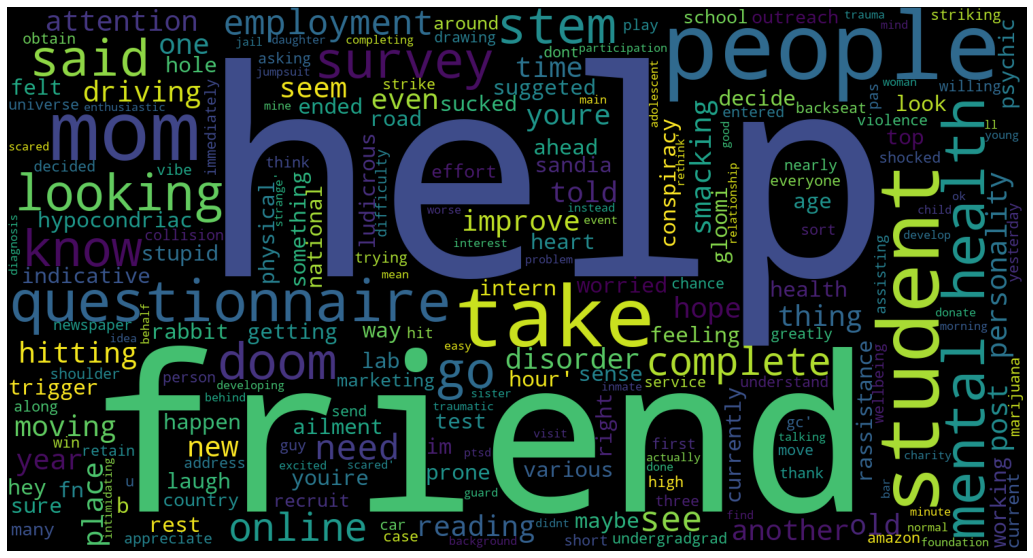

In [15]:
comment=df['text'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(comment))
plt.figure(figsize=(20,10))
plt.imshow(word_cloud)
plt.axis('off');

### Positive Words

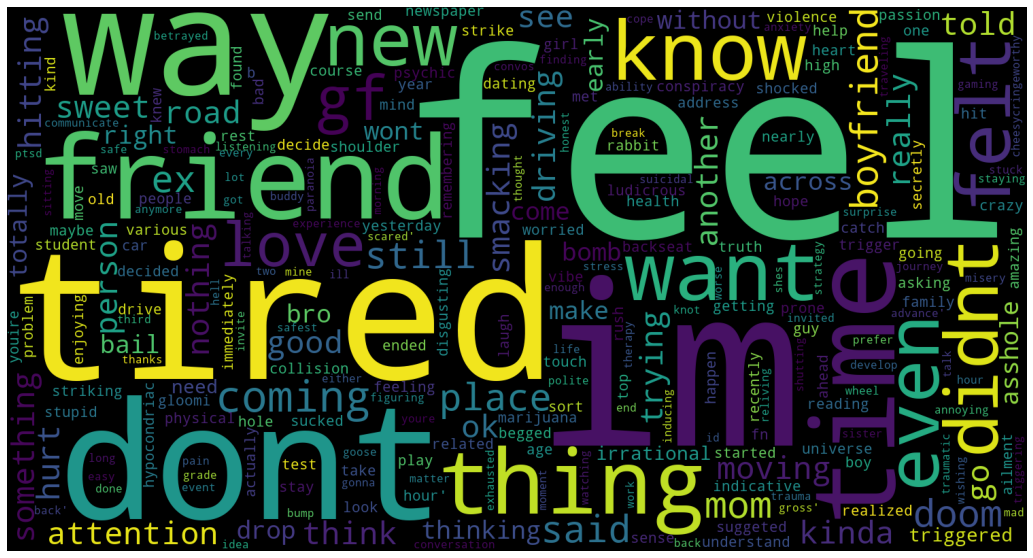

In [16]:
positive=df[df['label']==1]
comment=positive['text'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(comment))
plt.figure(figsize=(20,10))
plt.imshow(word_cloud)
plt.axis('off');

### Negative Words

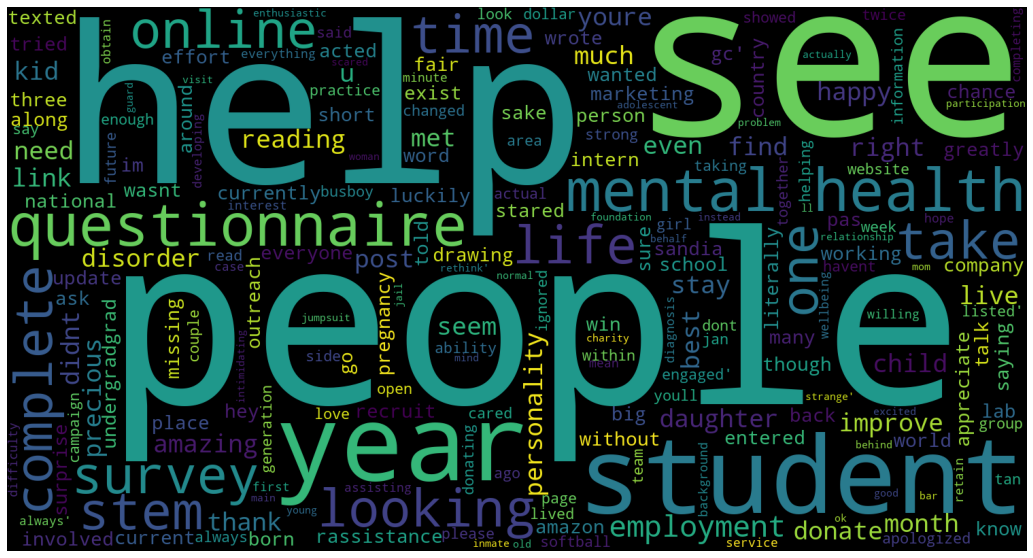

In [17]:
negative=df[df['label']==0]
comment=negative['text'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(comment))
plt.figure(figsize=(20,10))
plt.imshow(word_cloud)
plt.axis('off');

### Model Development

In [18]:
df['label'].value_counts()

1    1488
0    1350
Name: label, dtype: int64

**There is no problem of Unbalance of Classification, both the class have almost equal rows..**

#### Split into dependent and indepndent feature

In [19]:
X=df['text']
y=df['label'].values

#### Train Test split

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.10, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2554,) (284,) (2554,) (284,)


#### Convert text to vector

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

cvt=CountVectorizer(lowercase=True, stop_words='english', max_df=0.5, min_df=20, ngram_range=(1, 3))
cvt

CountVectorizer(max_df=0.5, min_df=20, ngram_range=(1, 3), stop_words='english')

In [22]:
cvt_fit=cvt.fit(x_train)
x_train_cvt=cvt_fit.transform(x_train).toarray()
x_test_cvt=cvt_fit.transform(x_test).toarray()

In [23]:
print(len(cvt_fit.get_feature_names()))

807


### 1. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr=lr.fit(x_train_cvt, y_train)
y_pred=lr.predict(x_test_cvt)

#### Model evaluation

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Out of {} values {} misclassified.".format(len(y_test), sum(y_test!=y_pred)))

Confusion Matrix:
 [[ 95  40]
 [ 42 107]]
Out of 284 values 82 misclassified.


In [26]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       137
           1       0.72      0.73      0.72       147

    accuracy                           0.71       284
   macro avg       0.71      0.71      0.71       284
weighted avg       0.71      0.71      0.71       284



In [27]:
train_accuracy=lr.score(x_train_cvt, y_train).round(4)*100
test_accuracy=lr.score(x_test_cvt,y_test).round(4)*100
pred_accuracy=accuracy_score(y_pred,y_test).round(4)*100

results=pd.DataFrame({"Model":["Logistic Regression"],
                      "Training Accuracy":[train_accuracy],
                      "Testing Accuracy":[test_accuracy],
                      "Prediction Accuracy":[pred_accuracy]})
results

Model  Training Accuracy  Testing Accuracy  \
0  Logistic Regression              88.41             71.13   

   Prediction Accuracy  
0                71.13

**Prediction Accuracy 71.13%**

### 2. KNN classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn=knn.fit(x_train_cvt, y_train)
y_pred=knn.predict(x_test_cvt)

In [29]:
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Out of {} values {} misclassified.".format(len(y_test), sum(y_test!=y_pred)))

Confusion Matrix:
 [[114  21]
 [ 94  55]]
Out of 284 values 115 misclassified.


In [30]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.55      0.66       208
           1       0.37      0.72      0.49        76

    accuracy                           0.60       284
   macro avg       0.61      0.64      0.58       284
weighted avg       0.72      0.60      0.62       284



In [31]:
train_accuracy=knn.score(x_train_cvt, y_train).round(4)*100
test_accuracy=knn.score(x_test_cvt,y_test).round(4)*100
pred_accuracy=accuracy_score(y_pred,y_test).round(4)*100

result=pd.DataFrame({"Model":["KNN"],
                      "Training Accuracy":[train_accuracy],
                      "Testing Accuracy":[test_accuracy],
                      "Prediction Accuracy":[pred_accuracy]})
results=pd.concat([results,result])
results

Model  Training Accuracy  Testing Accuracy  \
0  Logistic Regression              88.41             71.13   
0                  KNN              81.95             59.51   

   Prediction Accuracy  
0                71.13  
0                59.51

**Accuracy is not good, it is lower than Logistic Regression.**

### 3. Support vector machine

In [32]:
from sklearn.svm import SVC

svm=SVC(random_state=0)
svm=svm.fit(x_train_cvt,y_train)
y_pred=svm.predict(x_test_cvt)

In [33]:
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Out of {} values {} misclassified.".format(len(y_test), sum(y_test!=y_pred)))

Confusion Matrix:
 [[ 99  36]
 [ 31 118]]
Out of 284 values 67 misclassified.


In [34]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       130
           1       0.79      0.77      0.78       154

    accuracy                           0.76       284
   macro avg       0.76      0.76      0.76       284
weighted avg       0.77      0.76      0.76       284



In [35]:
train_accuracy=svm.score(x_train_cvt, y_train).round(4)*100
test_accuracy=svm.score(x_test_cvt,y_test).round(4)*100
pred_accuracy=accuracy_score(y_pred,y_test).round(4)*100

result=pd.DataFrame({"Model":["SVM"],
                      "Training Accuracy":[train_accuracy],
                      "Testing Accuracy":[test_accuracy],
                      "Prediction Accuracy":[pred_accuracy]})
results=pd.concat([results,result])
results

Model  Training Accuracy  Testing Accuracy  \
0  Logistic Regression              88.41             71.13   
0                  KNN              81.95             59.51   
0                  SVM              93.70             76.41   

   Prediction Accuracy  
0                71.13  
0                59.51  
0                76.41

**Accuracy is higher than Knn and logistic regression.**

### 4. Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt=dt.fit(x_train_cvt,y_train)
y_pred=dt.predict(x_test_cvt)

In [37]:
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Out of {} values {} misclassified.".format(len(y_test), sum(y_test!=y_pred)))

Confusion Matrix:
 [[78 57]
 [53 96]]
Out of 284 values 110 misclassified.


In [38]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59       131
           1       0.64      0.63      0.64       153

    accuracy                           0.61       284
   macro avg       0.61      0.61      0.61       284
weighted avg       0.61      0.61      0.61       284



In [39]:
train_accuracy=dt.score(x_train_cvt, y_train).round(4)*100
test_accuracy=dt.score(x_test_cvt,y_test).round(4)*100
pred_accuracy=accuracy_score(y_pred,y_test).round(4)*100

result=pd.DataFrame({"Model":["Decision Tree"],
                      "Training Accuracy":[train_accuracy],
                      "Testing Accuracy":[test_accuracy],
                      "Prediction Accuracy":[pred_accuracy]})
results=pd.concat([results,result])
results

Model  Training Accuracy  Testing Accuracy  \
0  Logistic Regression              88.41             71.13   
0                  KNN              81.95             59.51   
0                  SVM              93.70             76.41   
0        Decision Tree              99.84             61.27   

   Prediction Accuracy  
0                71.13  
0                59.51  
0                76.41  
0                61.27

**Training Accuracy is almost 100% but Prediction Accuracy is 63.38. Lower than SVM and Logistic Regression**

### 5. Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100, random_state=0)
rf=rf.fit(x_train_cvt,y_train)
y_pred=rf.predict(x_test_cvt)

In [41]:
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Out of {} values {} misclassified.".format(len(y_test), sum(y_test!=y_pred)))

Confusion Matrix:
 [[ 78  57]
 [ 19 130]]
Out of 284 values 76 misclassified.


In [42]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.58      0.80      0.67        97
           1       0.87      0.70      0.77       187

    accuracy                           0.73       284
   macro avg       0.73      0.75      0.72       284
weighted avg       0.77      0.73      0.74       284



In [43]:
train_accuracy=rf.score(x_train_cvt, y_train).round(4)*100
test_accuracy=rf.score(x_test_cvt,y_test).round(4)*100
pred_accuracy=accuracy_score(y_pred,y_test).round(4)*100

result=pd.DataFrame({"Model":["Random Forest"],
                      "Training Accuracy":[train_accuracy],
                      "Testing Accuracy":[test_accuracy],
                      "Prediction Accuracy":[pred_accuracy]})
results=pd.concat([results,result])
results

Model  Training Accuracy  Testing Accuracy  \
0  Logistic Regression              88.41             71.13   
0                  KNN              81.95             59.51   
0                  SVM              93.70             76.41   
0        Decision Tree              99.84             61.27   
0        Random Forest              99.84             73.24   

   Prediction Accuracy  
0                71.13  
0                59.51  
0                76.41  
0                61.27  
0                73.24

**Training accuracy os good and the Prediction accuracy is better than all above models except SVM.**

### 6. Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

naive=GaussianNB()
naive=naive.fit(x_train_cvt,np.array(y_train))
y_pred=naive.predict(x_test_cvt)

In [45]:
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Out of {} values {} misclassified.".format(len(y_test), sum(y_test!=y_pred)))

Confusion Matrix:
 [[ 78  57]
 [ 35 114]]
Out of 284 values 92 misclassified.


In [46]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.58      0.69      0.63       113
           1       0.77      0.67      0.71       171

    accuracy                           0.68       284
   macro avg       0.67      0.68      0.67       284
weighted avg       0.69      0.68      0.68       284



In [47]:
train_accuracy=naive.score(x_train_cvt, y_train).round(4)*100
test_accuracy=naive.score(x_test_cvt,y_test).round(4)*100
pred_accuracy=accuracy_score(y_pred,y_test).round(4)*100

result=pd.DataFrame({"Model":["Naive Bayes"],
                      "Training Accuracy":[train_accuracy],
                      "Testing Accuracy":[test_accuracy],
                      "Prediction Accuracy":[pred_accuracy]})
results=pd.concat([results,result])
results

Model  Training Accuracy  Testing Accuracy  \
0  Logistic Regression              88.41             71.13   
0                  KNN              81.95             59.51   
0                  SVM              93.70             76.41   
0        Decision Tree              99.84             61.27   
0        Random Forest              99.84             73.24   
0          Naive Bayes              78.50             67.61   

   Prediction Accuracy  
0                71.13  
0                59.51  
0                76.41  
0                61.27  
0                73.24  
0                67.61

**Accuracy is low.**

### 7. Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier(n_estimators=100, random_state=0)
gbc=gbc.fit(x_train_cvt,y_train)
y_pred=gbc.predict(x_test_cvt)

In [49]:
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Out of {} values {} misclassified.".format(len(y_test), sum(y_test!=y_pred)))

Confusion Matrix:
 [[ 92  43]
 [ 37 112]]
Out of 284 values 80 misclassified.


In [50]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70       129
           1       0.75      0.72      0.74       155

    accuracy                           0.72       284
   macro avg       0.72      0.72      0.72       284
weighted avg       0.72      0.72      0.72       284



In [51]:
train_accuracy=gbc.score(x_train_cvt, y_train).round(4)*100
test_accuracy=gbc.score(x_test_cvt,y_test).round(4)*100
pred_accuracy=accuracy_score(y_pred,y_test).round(4)*100

result=pd.DataFrame({"Model":["Gradient Boosting"],
                      "Training Accuracy":[train_accuracy],
                      "Testing Accuracy":[test_accuracy],
                      "Prediction Accuracy":[pred_accuracy]})
results=pd.concat([results,result])
results

Model  Training Accuracy  Testing Accuracy  \
0  Logistic Regression              88.41             71.13   
0                  KNN              81.95             59.51   
0                  SVM              93.70             76.41   
0        Decision Tree              99.84             61.27   
0        Random Forest              99.84             73.24   
0          Naive Bayes              78.50             67.61   
0    Gradient Boosting              81.32             71.83   

   Prediction Accuracy  
0                71.13  
0                59.51  
0                76.41  
0                61.27  
0                73.24  
0                67.61  
0                71.83

**Accuracy is better but Not good as Random Forest and SVM.**

### 8. Ada Boost

In [52]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(n_estimators=50, random_state=0)
ada=ada.fit(x_train_cvt,y_train)
y_pred=ada.predict(x_test_cvt)

In [53]:
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Out of {} values {} misclassified.".format(len(y_test), sum(y_test!=y_pred)))

Confusion Matrix:
 [[ 91  44]
 [ 42 107]]
Out of 284 values 86 misclassified.


In [54]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68       133
           1       0.72      0.71      0.71       151

    accuracy                           0.70       284
   macro avg       0.70      0.70      0.70       284
weighted avg       0.70      0.70      0.70       284



In [55]:
train_accuracy=ada.score(x_train_cvt, y_train).round(4)*100
test_accuracy=ada.score(x_test_cvt,y_test).round(4)*100
pred_accuracy=accuracy_score(y_pred,y_test).round(4)*100

result=pd.DataFrame({"Model":["Ada Boost"],
                      "Training Accuracy":[train_accuracy],
                      "Testing Accuracy":[test_accuracy],
                      "Prediction Accuracy":[pred_accuracy]})
results=pd.concat([results,result])
results

Model  Training Accuracy  Testing Accuracy  \
0  Logistic Regression              88.41             71.13   
0                  KNN              81.95             59.51   
0                  SVM              93.70             76.41   
0        Decision Tree              99.84             61.27   
0        Random Forest              99.84             73.24   
0          Naive Bayes              78.50             67.61   
0    Gradient Boosting              81.32             71.83   
0            Ada Boost              74.16             69.72   

   Prediction Accuracy  
0                71.13  
0                59.51  
0                76.41  
0                61.27  
0                73.24  
0                67.61  
0                71.83  
0                69.72

**Accuracy is Low.**

### 9. XGB

In [56]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb=xgb.fit(x_train_cvt,y_train)
y_pred=xgb.predict(x_test_cvt)

In [57]:
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Out of {} values {} misclassified.".format(len(y_test), sum(y_test!=y_pred)))

Confusion Matrix:
 [[101  34]
 [ 38 111]]
Out of 284 values 72 misclassified.


In [58]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       139
           1       0.74      0.77      0.76       145

    accuracy                           0.75       284
   macro avg       0.75      0.75      0.75       284
weighted avg       0.75      0.75      0.75       284



In [59]:
train_accuracy=xgb.score(x_train_cvt, y_train).round(4)*100
test_accuracy=xgb.score(x_test_cvt,y_test).round(4)*100
pred_accuracy=accuracy_score(y_pred,y_test).round(4)*100

result=pd.DataFrame({"Model":["XG Boost"],
                      "Training Accuracy":[train_accuracy],
                      "Testing Accuracy":[test_accuracy],
                      "Prediction Accuracy":[pred_accuracy]})
results=pd.concat([results,result])
results

Model  Training Accuracy  Testing Accuracy  \
0  Logistic Regression              88.41             71.13   
0                  KNN              81.95             59.51   
0                  SVM              93.70             76.41   
0        Decision Tree              99.84             61.27   
0        Random Forest              99.84             73.24   
0          Naive Bayes              78.50             67.61   
0    Gradient Boosting              81.32             71.83   
0            Ada Boost              74.16             69.72   
0             XG Boost              94.83             74.65   

   Prediction Accuracy  
0                71.13  
0                59.51  
0                76.41  
0                61.27  
0                73.24  
0                67.61  
0                71.83  
0                69.72  
0                74.65

### Model Results

In [60]:
res=pd.pivot_table(results, index='Model', values=['Training Accuracy','Prediction Accuracy'],
                  aggfunc=sum).sort_values(by='Prediction Accuracy', ascending=False)
res

Prediction Accuracy  Training Accuracy
Model                                                      
SVM                                76.41              93.70
XG Boost                           74.65              94.83
Random Forest                      73.24              99.84
Gradient Boosting                  71.83              81.32
Logistic Regression                71.13              88.41
Ada Boost                          69.72              74.16
Naive Bayes                        67.61              78.50
Decision Tree                      61.27              99.84
KNN                                59.51              81.95

In [61]:
import plotly.express as px

res.reset_index(inplace=True)
fig=px.bar(data_frame=res, x='Model',
          y=['Training Accuracy','Prediction Accuracy'],
          title='Model Evaluation')
fig.show()

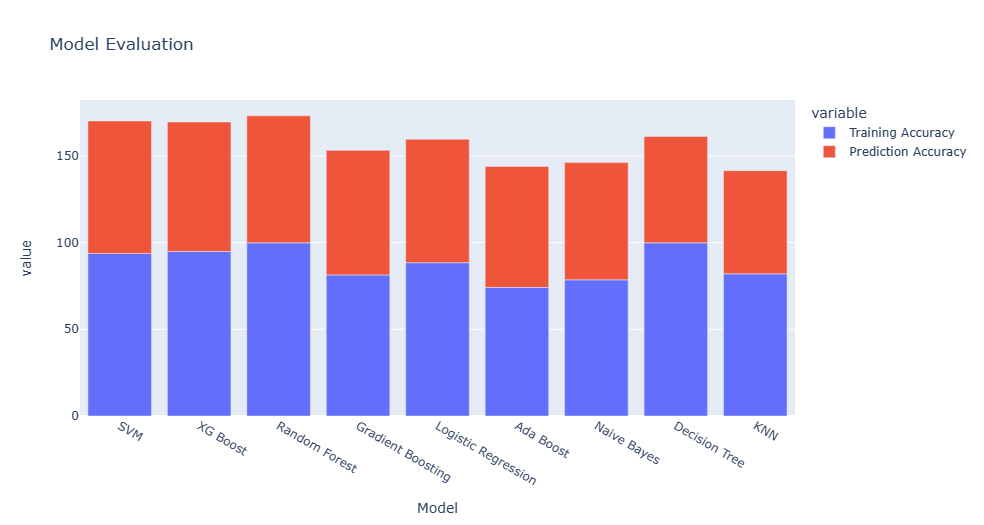

#### SVM has training accuracy 93% and Prediction accuracy almost 77% hence choose SVM to predict for unseen data.

### Test the Model:

In [70]:
comment=['''Money plays an important role in our lives. All our needs and desires can be fulfilled by money.
In the absence of money we have to borrow money from others in order to get our needs fulfilled.
Our failure to replay the borrowings causes a lot of stress in our minds.''',

'''Spend some time with nature, go for a walk or call a friend, whatever pleases you.  You can also 
try working out, listening to music and more. As long as it makes you happy, never give up.''']

dd=pd.DataFrame(comment, columns=['comment'])
dd

comment
0  Money plays an important role in our lives. All our needs and desires can be fulfilled by money.\nIn the absence of money we have to borrow money from others in order to get our needs fulfilled.\nOur failure to replay the borrowings causes a lot of stress in our minds.
1                                                                                 Spend some time with nature, go for a walk or call a friend, whatever pleases you.  You can also \ntry working out, listening to music and more. As long as it makes you happy, never give up.

In [71]:
dd['comment']=dd['comment'].apply(clean)
dd

comment
0  money play important role life need desire fulfilled moneyin absence money borrow money others order get need fulfilledour failure replay borrowing cause lot stress mind
1                                                           spend time nature go walk call friend whatever plea  also try working listening music long make happy never give

In [72]:
dd=cvt_fit.transform(dd.comment).toarray()
out=svm.predict(dd)
for i in out:
    if i ==1:
        print("Stressed")
    else:
        print("Not Stressed")

Stressed
Not Stressed
